In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows=999
pd.options.display.max_columns=999

In [43]:
def clean_data(df):
    years = [str(year) for year in range(1960,2000)]
    years.extend(['Unnamed: 63','Indicator Code','Indicator Name'])
    df.head()
    df = df.drop(columns=years)
    df = df.drop(index = df[df.sum(axis=1) == 0].index)
    df['Average %'] = df.mean(axis=1)
    cols = df.columns.tolist()
    cols = cols[0:2] + cols[-1:] + cols[2:-1]
    df = df[cols]
    return df

def create_data(file_loc):
    df = pd.read_csv(file_loc)
    df = clean_data(df)
    return df

In [29]:
PrimaryCompletion = pd.read_csv('Data/Primary_Completion_Rate.csv')

In [33]:
PrimaryCompletion = clean_data(PrimaryCompletion)

In [39]:
PrimaryCompletion.shape

(228, 22)

In [38]:
ChildEmploymentF = pd.read_csv('Data/Child_Employment_Female.csv')
ChildEmploymentF = clean_data(ChildEmploymentF)
ChildEmploymentF.shape

(97, 22)

In [40]:
ChildEmploymentM = pd.read_csv('Data/Child_Employment_Male.csv')
ChildEmploymentM = clean_data(ChildEmploymentM)
ChildEmploymentM.shape

(97, 22)

In [49]:
GovExpend = create_data('Data/Government_Expenditure.csv')
GovExpend.shape

(209, 22)

In [47]:
PopDense = create_data('Data/Population_Density.csv')
PopDense.shape

(261, 22)

In [48]:
UrbanPop = create_data('Data/Urban_Population.csv')
UrbanPop.shape

(261, 22)

In [197]:
AgriLand = create_data('Data/Agricultural_Land.csv')
AgriLand.shape

(255, 22)

In [225]:
Metadata = pd.read_csv('Data/Country_Metadata.csv')
Metadata = Metadata[['TableName','Country Code','Region','IncomeGroup']]
Metadata.head()

,TableName,Country Code,Region,IncomeGroup
0,Aruba,ABW,Latin America & Caribbean,High income
1,Afghanistan,AFG,South Asia,Low income
2,Angola,AGO,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Europe & Central Asia,Upper middle income
4,Andorra,AND,Europe & Central Asia,High income


In [226]:
Metadata = pd.concat([Metadata,pd.get_dummies(Metadata['IncomeGroup']),pd.get_dummies(Metadata['Region'])],1)
Metadata.head()

,TableName,Country Code,Region,IncomeGroup,High income,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,ABW,Latin America & Caribbean,High income,1,0,0,0,0,0,1,0,0,0,0
1,Afghanistan,AFG,South Asia,Low income,0,1,0,0,0,0,0,0,0,1,0
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,0,0,1,0,0,0,0,0,0,0,1
3,Albania,ALB,Europe & Central Asia,Upper middle income,0,0,0,1,0,1,0,0,0,0,0
4,Andorra,AND,Europe & Central Asia,High income,1,0,0,0,0,1,0,0,0,0,0


In [254]:
GiniIndex = create_data('Data/GINI_Index.csv')
GiniIndex.head()

,Country Name,Country Code,Average %,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Angola,AGO,47.350000,52.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,30.325000,NaN,NaN,31.7,NaN,NaN,30.6,NaN,...,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,ARG,45.770588,51.1,53.3,53.8,50.7,48.3,47.7,46.6,...,43.9,43.0,42.3,41.2,41.0,41.4,NaN,42.4,40.6,NaN
8,Armenia,ARM,32.023529,NaN,35.4,34.8,33.0,37.5,36.0,29.7,...,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,NaN
11,Australia,AUS,34.333333,NaN,33.5,NaN,33.5,33.1,NaN,NaN,...,NaN,34.7,NaN,NaN,NaN,35.8,NaN,NaN,NaN,NaN


In [246]:
dataframes = [PrimaryCompletion,ChildEmploymentF,ChildEmploymentM,GovExpend,PopDense,UrbanPop,AgriLand,Metadata,GiniIndex]

In [255]:
# PrimaryCompletion.rename(columns={'Average %':'Average Primary School Completion'},inplace=True)
# ChildEmploymentF.rename(columns={'Average %':'Average Female Children Employment'},inplace=True)
# ChildEmploymentM.rename(columns={'Average %':'Average Male Children Employment'},inplace=True)
# GovExpend.rename(columns={'Average %':'Average GDP Spent on Education'},inplace=True)
# PopDense.rename(columns={'Average %':'Average Population'},inplace=True)
# UrbanPop.rename(columns={'Average %':'Average Urban Population'},inplace=True)
# AgriLand.rename(columns={'Average %':'Agricultural Land'},inplace=True)
# GiniIndex.rename(columns={'Average %':'GINI Index'},inplace=True)

In [256]:
# maindf = pd.merge(left=PrimaryCompletion[['Country Name','Average Primary School Completion']],right=ChildEmploymentF[['Country Name','Average Female Children Employment']],how='outer',left_on='Country Name',right_on='Country Name')
# maindf = pd.merge(left=maindf,right=ChildEmploymentM[['Country Name','Average Male Children Employment']],how='outer',left_on='Country Name',right_on='Country Name')
# maindf = pd.merge(left=maindf,right=GovExpend[['Country Name','Average GDP Spent on Education']],how='outer',left_on='Country Name',right_on='Country Name')
# maindf = pd.merge(left=maindf,right=PopDense[['Country Name','Average Population']],how='outer',left_on='Country Name',right_on='Country Name')
# maindf = pd.merge(left=maindf,right=UrbanPop[['Country Name','Average Urban Population']],how='outer',left_on='Country Name',right_on='Country Name')
# maindf = pd.merge(left=maindf,right=AgriLand[['Country Name','Agricultural Land']],how='outer',left_on='Country Name',right_on='Country Name')
# maindf = pd.merge(left=maindf,right=Metadata,how='outer',left_on='Country Name',right_on='TableName')
maindf = pd.merge(left=maindf,right=GiniIndex,how='outer',left_on='Country Name',right_on='Country Name')

In [267]:
pickle.dump(maindf,open('../Data/cleaned_data.pickle','wb'),pickle.HIGHEST_PROTOCOL)

In [268]:
pickle.load(open('../Data/cleaned_data.pickle','rb'))

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,GINI Index,Region,...,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,94.458710,NaN,NaN,14.307146,559.365205,44.136947,11.111111,NaN,Latin America & Caribbean,...,0,0,0,0,0,1,0,0,0,0
1,Angola,41.000475,30.100000,30.000000,NaN,18.382628,58.639895,46.671448,47.350000,Sub-Saharan Africa,...,0,1,0,0,0,0,0,0,0,1
2,Albania,97.193730,18.414440,24.173033,29.845680,107.789280,51.027526,42.261679,30.325000,Europe & Central Asia,...,0,0,1,0,1,0,0,0,0,0
3,Arab World,82.402230,NaN,NaN,NaN,30.996646,55.952922,36.465499,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,NaN,Middle East & North Africa,...,0,0,0,0,0,0,1,0,0,0
5,Argentina,101.405976,6.643352,11.047324,13.124827,14.823043,90.614737,51.637240,45.770588,Latin America & Caribbean,...,0,0,1,0,0,1,0,0,0,0
6,Armenia,95.185489,7.500000,12.000000,10.983123,103.612610,63.624895,56.680303,32.023529,Europe & Central Asia,...,0,0,1,0,1,0,0,0,0,0
7,Antigua and Barbuda,88.527339,NaN,NaN,8.693380,196.539474,27.498158,20.454545,NaN,Latin America & Caribbean,...,0,0,0,0,0,1,0,0,0,0
8,Austria,98.512104,NaN,NaN,22.971336,101.440646,58.318316,34.010416,30.269231,Europe & Central Asia,...,0,0,0,0,1,0,0,0,0,0
9,Azerbaijan,95.473141,5.915139,8.907135,NaN,108.079907,53.322947,57.590232,28.360000,Europe & Central Asia,...,0,0,1,0,1,0,0,0,0,0


In [269]:
maindf.head()

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,GINI Index,Region,...,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,94.458710,NaN,NaN,14.307146,559.365205,44.136947,11.111111,NaN,Latin America & Caribbean,...,0,0,0,0,0,1,0,0,0,0
1,Angola,41.000475,30.10000,30.000000,NaN,18.382628,58.639895,46.671448,47.350,Sub-Saharan Africa,...,0,1,0,0,0,0,0,0,0,1
2,Albania,97.193730,18.41444,24.173033,29.845680,107.789280,51.027526,42.261679,30.325,Europe & Central Asia,...,0,0,1,0,1,0,0,0,0,0
3,Arab World,82.402230,NaN,NaN,NaN,30.996646,55.952922,36.465499,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,NaN,Middle East & North Africa,...,0,0,0,0,0,0,1,0,0,0


In [231]:
# maindf = pd.concat([maindf,pd.get_dummies(maindf['IncomeGroup']),pd.get_dummies(maindf['Region'])],1)
# maindf.head()

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,Region,IncomeGroup,...,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
0,Aruba,94.458710,NaN,NaN,14.307146,559.365205,44.136947,11.111111,Latin America & Caribbean,High income,...,0,0,0,0,0,1,0,0,0,0
1,Angola,41.000475,30.10000,30.000000,NaN,18.382628,58.639895,46.671448,Sub-Saharan Africa,Lower middle income,...,0,1,0,0,0,0,0,0,0,1
2,Albania,97.193730,18.41444,24.173033,29.845680,107.789280,51.027526,42.261679,Europe & Central Asia,Upper middle income,...,0,0,1,0,1,0,0,0,0,0
3,Arab World,82.402230,NaN,NaN,NaN,30.996646,55.952922,36.465499,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,Middle East & North Africa,High income,...,0,0,0,0,0,0,1,0,0,0


In [270]:
corr = maindf.corr()
corr

,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,GINI Index,High income,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Average Primary School Completion,1.000000,-0.701899,-0.721385,0.356563,0.088956,0.493021,-0.180186,-0.208329,0.338139,-0.598385,-0.130791,0.290334,0.197953,0.297284,0.181709,0.060315,0.042721,0.039244,-0.632692
Average Female Children Employment,-0.701899,1.000000,0.972025,-0.236341,-0.144484,-0.520244,-0.020312,0.091976,-0.240812,0.630692,-0.096099,-0.445536,-0.079366,-0.234984,-0.371560,-0.270280,NaN,-0.080940,0.712133
Average Male Children Employment,-0.721385,0.972025,1.000000,-0.211282,-0.129536,-0.517523,0.002575,0.111603,-0.251022,0.617178,-0.090206,-0.431321,-0.121990,-0.250744,-0.307391,-0.275345,NaN,-0.093613,0.705076
Average GDP Spent on Education,0.356563,-0.236341,-0.211282,1.000000,-0.140624,0.286378,0.091337,-0.312669,0.199007,-0.261544,-0.010818,0.071315,-0.068088,0.409848,-0.014609,0.055276,0.025112,-0.139303,-0.249236
Average Population,0.088956,-0.144484,-0.129536,-0.140624,1.000000,0.236032,-0.134012,-0.164134,0.212362,-0.052487,-0.057082,-0.067623,0.161924,0.042662,-0.041229,-0.016444,0.004005,0.010453,-0.067938
Average Urban Population,0.493021,-0.520244,-0.517523,0.286378,0.236032,1.000000,-0.208662,-0.202081,0.517909,-0.409077,-0.284322,0.079960,0.016626,0.206334,0.132853,0.227112,0.139898,-0.225184,-0.380415
Agricultural Land,-0.180186,-0.020312,0.002575,0.091337,-0.134012,-0.208662,1.000000,0.053704,-0.264439,0.208906,0.139117,-0.003393,-0.214339,0.143755,-0.134895,-0.061897,-0.098693,0.050886,0.210407
GINI Index,-0.208329,0.091976,0.111603,-0.312669,-0.164134,-0.202081,0.053704,1.000000,-0.396493,0.097066,0.123013,0.180885,-0.061328,-0.592624,0.511158,-0.152057,-0.023200,-0.063640,0.410470
High income,0.338139,-0.240812,-0.251022,0.199007,0.212362,0.517909,-0.264439,-0.396493,1.000000,-0.232994,-0.295012,-0.353012,0.056266,0.397524,0.088129,0.054417,0.165429,-0.115010,-0.277045
Low income,-0.598385,0.630692,0.617178,-0.261544,-0.052487,-0.409077,0.208906,0.097066,-0.232994,1.000000,-0.163027,-0.195079,-0.142896,-0.162013,-0.121233,-0.017449,-0.038544,0.075738,0.590440


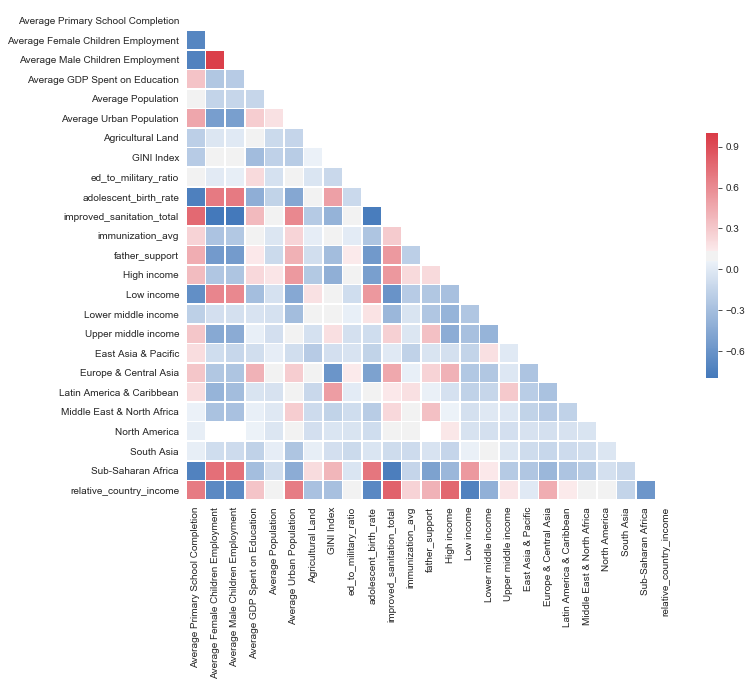

In [27]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

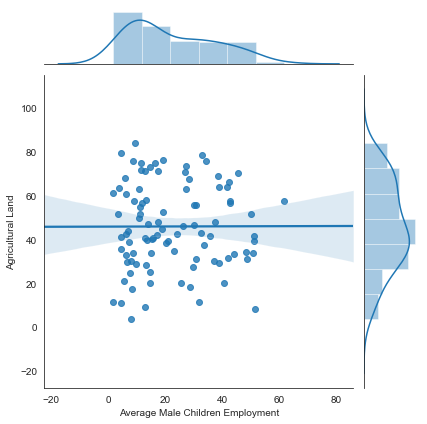

In [210]:
sns.jointplot(x='Average Male Children Employment',y='Agricultural Land',kind='reg',data=maindf)
# sns.distplot(maindf['Average Male Children Employment'].dropna())
# sns.distplot(maindf['Agricultural Land'].dropna())

In [263]:
maindf.count()

Country Name                          263
Average Primary School Completion     228
Average Female Children Employment     97
Average Male Children Employment       97
Average GDP Spent on Education        209
Average Population                    261
Average Urban Population              261
Agricultural Land                     255
Region                                213
IncomeGroup                           213
High income                           263
Low income                            263
Lower middle income                   263
Upper middle income                   263
East Asia & Pacific                   263
Europe & Central Asia                 263
Latin America & Caribbean             263
Middle East & North Africa            263
North America                         263
South Asia                            263
Sub-Saharan Africa                    263
GINI Index                            159
dtype: int64

In [213]:
maindf[maindf['Average Primary School Completion'] == maindf['Average Primary School Completion'].max()]

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land
128,Maldives,138.221984,NaN,NaN,15.226381,1243.781053,35.196632,29.470588


In [9]:
data[(data['Country Name'].isnull())][['countries']]

,countries
263,Bahamas
264,Bolivia (Plurinational State of)
265,Central African Republic
266,Congo
267,Cook Islands
268,Côte d'Ivoire
269,Democratic People's Republic of Korea
270,Democratic Republic of the Congo
271,Egypt
272,Gambia


In [10]:
data = pickle.load(open('../Data/data.pickle','rb'))

In [13]:
data

,Country Name,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,GINI Index,ed_to_military_ratio,adolescent_birth_rate,improved_sanitation_total,immunization_avg,father_support,Region,IncomeGroup,High income,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,relative_country_income
1,Angola,41.000475,30.100000,30.000000,NaN,18.382628,58.639895,46.671448,47.350000,0.827895,190.90,52.0,73.000,NaN,Sub-Saharan Africa,Lower middle income,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,Albania,97.193730,18.414440,24.173033,29.845680,107.789280,51.027526,42.261679,30.325000,NaN,17.60,93.0,86.000,52.80,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,United Arab Emirates,91.408940,NaN,NaN,NaN,97.491177,83.603789,6.716998,NaN,NaN,34.20,98.0,89.250,NaN,Middle East & North Africa,High income,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,Argentina,101.405976,6.643352,11.047324,13.124827,14.823043,90.614737,51.637240,45.770588,6.862963,69.60,96.0,82.000,56.70,Latin America & Caribbean,Upper middle income,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
5,Armenia,95.185489,7.500000,12.000000,10.983123,103.612610,63.624895,56.680303,32.023529,0.562925,22.70,89.0,82.375,NaN,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
6,Antigua and Barbuda,88.527339,NaN,NaN,8.693380,196.539474,27.498158,20.454545,NaN,NaN,66.80,NaN,73.750,NaN,Latin America & Caribbean,High income,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
7,Austria,98.512104,NaN,NaN,22.971336,101.440646,58.318316,34.010416,30.269231,7.069770,8.43,100.0,70.250,NaN,Europe & Central Asia,High income,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
8,Azerbaijan,95.473141,5.915139,8.907135,NaN,108.079907,53.322947,57.590232,28.360000,0.521535,47.20,89.0,79.625,NaN,Europe & Central Asia,Upper middle income,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
9,Burundi,48.716837,26.359093,27.393380,12.436066,331.864000,10.473632,73.220176,36.000000,2.415133,65.00,48.0,95.375,19.60,Sub-Saharan Africa,Low income,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
10,Benin,62.947807,49.900000,48.600000,10.900368,80.092427,42.633211,31.049287,43.266667,5.310205,98.00,20.0,62.375,5.20,Sub-Saharan Africa,Low income,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


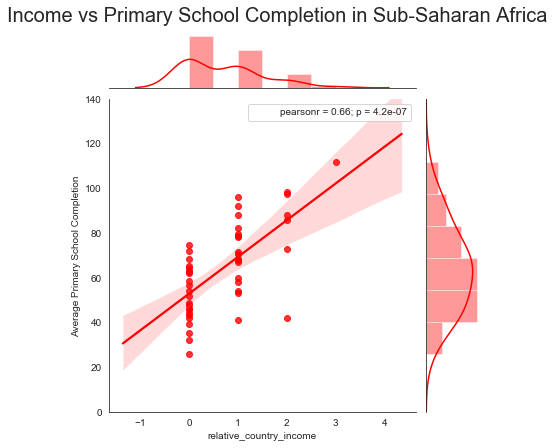

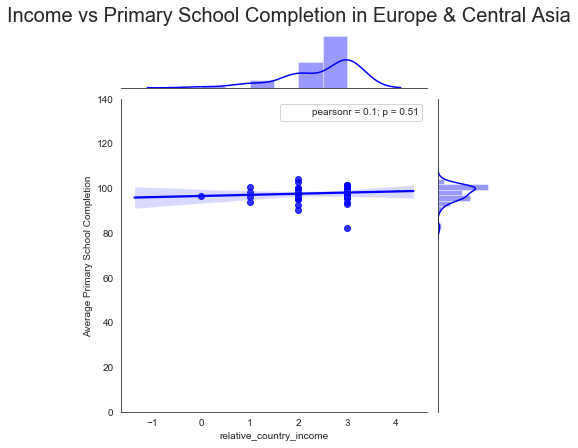

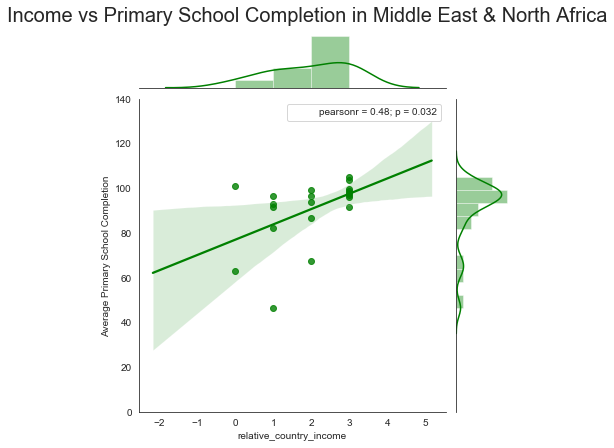

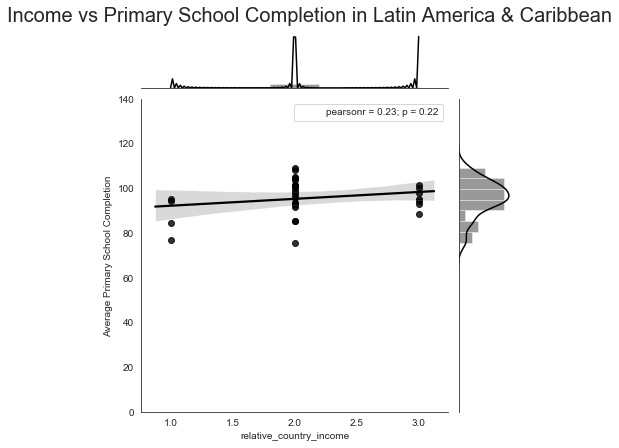

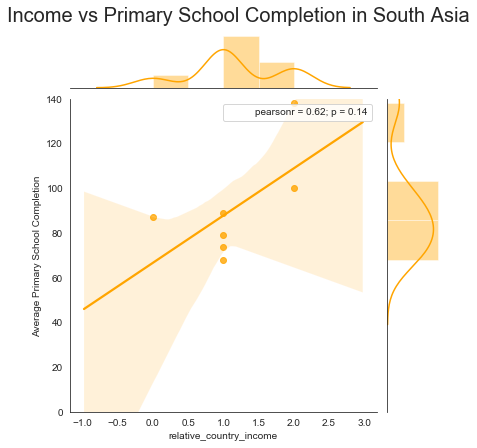

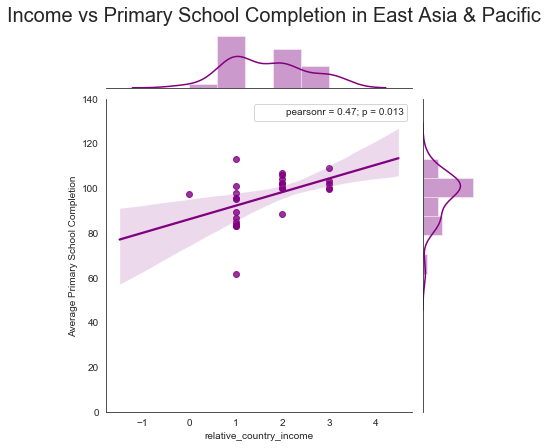

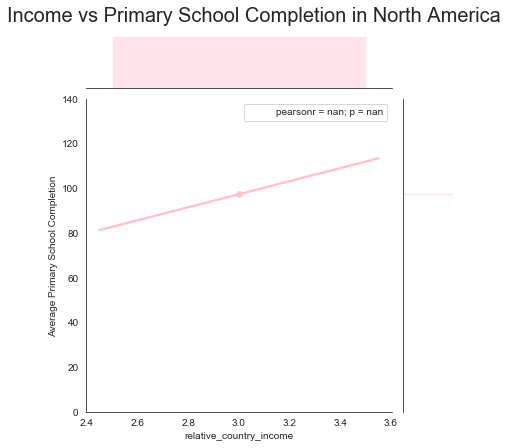

In [59]:
colors = ['red','blue','green','black','orange','purple','pink']
count=0
for region in list(zip(data['Region'].unique(),colors)):
    plots = sns.jointplot(x='relative_country_income',
                  y='Average Primary School Completion',
                  data=data[data['Region']==region[0]],
                  color=region[1], label=region[0], kind='reg',
                  ylim=(0,140))
    plots.fig.suptitle('Income vs Primary School Completion in '+region[0],y=1.03,fontsize=20)
    plots.annotate(stats.pearsonr)
    count+=1

Our hypothesis with 99% confidence is:

H<sub>0</sub> : `This region does not effect the Income and Primary School Completion relationship`

H<sub>a</sub> : `This region does effect the Income and Primary School Completion relationship`

It seems here that the Sub-Saharan African region and school completion ARE related to income, whereas for all the other regions, there’s not as much of a relationship (except East Asia, but the error range is so large here that we’re forced to conclude that there’s not enough data to relate the variables).

Interaction term: $$SSA \cdot RCI$$
(SSA = sub-saharan african region, RCI = relative country income)

In [30]:
corr

,Average Primary School Completion,Average Female Children Employment,Average Male Children Employment,Average GDP Spent on Education,Average Population,Average Urban Population,Agricultural Land,GINI Index,ed_to_military_ratio,adolescent_birth_rate,improved_sanitation_total,immunization_avg,father_support,High income,Low income,Lower middle income,Upper middle income,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,relative_country_income
Average Primary School Completion,1.000000,-0.701899,-0.721385,0.333572,0.126474,0.472736,-0.178705,-0.208329,0.096856,-0.733257,0.775416,0.254055,0.435324,0.366068,-0.634322,-0.176090,0.315393,0.202493,0.320173,0.202998,0.060785,0.040235,0.039488,-0.720745,0.679303
Average Female Children Employment,-0.701899,1.000000,0.972025,-0.236341,-0.144484,-0.520244,-0.020312,0.091976,0.006677,0.690926,-0.793002,-0.264492,-0.553922,-0.240812,0.630692,-0.066061,-0.445536,-0.079366,-0.234984,-0.371560,-0.270280,NaN,-0.080940,0.737116,-0.672661
Average Male Children Employment,-0.721385,0.972025,1.000000,-0.211282,-0.129536,-0.517523,0.002575,0.111603,0.037762,0.691483,-0.786355,-0.229620,-0.544337,-0.251022,0.617178,-0.062002,-0.431321,-0.121990,-0.250744,-0.307391,-0.275345,NaN,-0.093613,0.728336,-0.663479
Average GDP Spent on Education,0.333572,-0.236341,-0.211282,1.000000,-0.130909,0.279558,0.108199,-0.312669,0.219589,-0.411050,0.374126,0.075682,0.149972,0.227138,-0.301709,-0.039009,0.047365,-0.074274,0.416167,-0.029875,0.041860,0.063912,-0.158055,-0.295807,0.320629
Average Population,0.126474,-0.144484,-0.129536,-0.130909,1.000000,0.186399,-0.101152,-0.163939,-0.052823,-0.150608,0.114430,-0.018276,-0.105597,0.162389,-0.054308,-0.057406,-0.066080,0.033001,0.080060,-0.047920,-0.004883,-0.019060,0.026591,-0.073415,0.131808
Average Urban Population,0.472736,-0.520244,-0.517523,0.279558,0.186399,1.000000,-0.140165,-0.202081,0.117651,-0.459394,0.619026,0.244593,0.418969,0.533330,-0.452947,-0.308473,0.117892,-0.076162,0.279624,0.096340,0.285490,0.109122,-0.251094,-0.422492,0.671858
Agricultural Land,-0.178705,-0.020312,0.002575,0.108199,-0.101152,-0.140165,1.000000,0.058076,-0.023284,0.070383,-0.216616,0.030677,-0.074237,-0.219418,0.186455,0.134793,-0.054545,-0.211559,0.133155,-0.119459,-0.095361,-0.064754,0.040013,0.214315,-0.279836
GINI Index,-0.208329,0.091976,0.111603,-0.312669,-0.163939,-0.202081,0.058076,1.000000,-0.119894,0.500854,-0.374267,0.137167,-0.308860,-0.403454,0.094003,0.109433,0.195603,-0.064869,-0.587775,0.510858,-0.155350,-0.024219,-0.065684,0.394617,-0.284317
ed_to_military_ratio,0.096856,0.006677,0.037762,0.219589,-0.052823,0.117651,-0.023284,-0.119894,1.000000,-0.107922,0.084267,0.017239,0.143418,0.084600,-0.082364,0.040528,-0.058253,-0.037952,0.141177,0.014103,-0.079341,-0.036441,-0.100538,-0.026661,0.077872
adolescent_birth_rate,-0.733257,0.690926,0.691483,-0.411050,-0.150608,-0.459394,0.070383,0.500854,-0.107922,1.000000,-0.764041,-0.249170,-0.557493,-0.517834,0.542972,0.178699,-0.081441,-0.154296,-0.502367,0.127752,-0.203831,-0.079293,-0.022991,0.711611,-0.675138


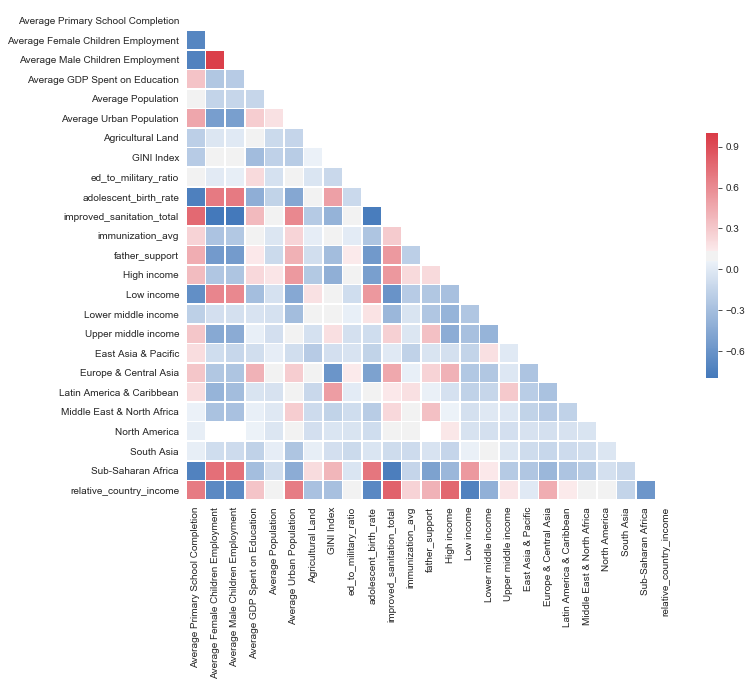

In [49]:
CorrMtx(corr,dropDuplicates=True)

In [107]:
# data.columns = [name.replace('&','and') for name in data.columns]
variables = data.columns[2:14].tolist() + data.columns.tolist()[16:]
# variables = data.columns[6:7].tolist()

In [108]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(variables), data=data).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.923
Model:                                           OLS   Adj. R-squared:                  0.813
Method:                                Least Squares   F-statistic:                     8.370
Date:                               Wed, 21 Aug 2019   Prob (F-statistic):           9.97e-05
Time:                                       16:20:07   Log-Likelihood:                -108.85
No. Observations:                                 35   AIC:                             259.7
Df Residuals:                                     14   BIC:                             292.4
Df Model:                                         20                                         
Covariance Type:                           nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             31.0057     16.528      1.876      0.082      -4.443      66.455
Average_Female_Children_Employment     0.4553      0.649      0.701      0.495      -0.937       1.848
Average_Male_Children_Employment      -0.3042      0.613     -0.496      0.628      -1.619       1.011
Average_GDP_Spent_on_Education        -0.1293      0.218     -0.595      0.562      -0.596       0.337
Average_Population                    -0.0056      0.014     -0.398      0.697      -0.036       0.024
Average_Urban_Population               0.3016      0.144      2.097      0.055      -0.007       0.610
Agricultural_Land                     -0.0157      0.116     -0.136      0.894      -0.264       0.232
GINI_Index                             0.5103      0.501      1.019      0.325      -0.564       1.584
ed_to_military_ratio                   0.0434      0.434      0.100      0.922      -0.887       0.974
adolescent_birth_rate                 -0.1941      0.077     -2.537      0.024      -0.358      -0.030
improved_sanitation_total              0.0511      0.161      0.317      0.756      -0.294       0.396
immunization_avg                       0.1137      0.162      0.702      0.494      -0.234       0.461
father_support                        -0.0513      0.118     -0.434      0.671      -0.305       0.202
High_income                           -4.2167      4.900     -0.861      0.404     -14.726       6.292
Low_income                            18.9402     10.951      1.729      0.106      -4.548      42.429
Lower_middle_income                   12.6110      6.925      1.821      0.090      -2.241      27.463
Upper_middle_income                    3.6712      5.533      0.664      0.518      -8.195      15.538
East_Asia_and_Pacific                 12.3248      4.863      2.534      0.024       1.894      22.756
Europe_and_Central_Asia               15.0717      7.887      1.911      0.077      -1.843      31.987
Latin_America_and_Caribbean            4.6587      9.499      0.490      0.631     -15.715      25.033
Middle_East_and_North_Africa          -3.2766      8.576     -0.382      0.708     -21.670      15.117
North_America                               0          0        nan        nan           0           0
South_Asia                            13.5055      9.365      1.442      0.171      -6.581      33.592
Sub_Saharan_Africa                   -11.2785      7.039     -1.602      0.131     -26.377       3.820
relative_country_income                7.3032      5.849      1.249      0.232      -5.242      19.848
==================================

In [116]:
for column in data.columns.tolist():
    print(data[['Average_Primary_School_Completion',column]].dropna().shape[0],column)

177 Country_Name
177 Average_Primary_School_Completion
92 Average_Female_Children_Employment
92 Average_Male_Children_Employment
149 Average_GDP_Spent_on_Education
175 Average_Population
177 Average_Urban_Population
175 Agricultural_Land
149 GINI_Index
116 ed_to_military_ratio
176 adolescent_birth_rate
167 improved_sanitation_total
175 immunization_avg
71 father_support
177 Region
177 IncomeGroup
177 High_income
177 Low_income
177 Lower_middle_income
177 Upper_middle_income
177 East_Asia_and_Pacific
177 Europe_and_Central_Asia
177 Latin_America_and_Caribbean
177 Middle_East_and_North_Africa
177 North_America
177 South_Asia
177 Sub_Saharan_Africa
177 relative_country_income


In [111]:
data.count()

Country_Name                          194
Average_Primary_School_Completion     177
Average_Female_Children_Employment     97
Average_Male_Children_Employment       97
Average_GDP_Spent_on_Education        160
Average_Population                    192
Average_Urban_Population              194
Agricultural_Land                     191
GINI_Index                            158
ed_to_military_ratio                  124
adolescent_birth_rate                 192
improved_sanitation_total             180
immunization_avg                      192
father_support                         75
Region                                194
IncomeGroup                           194
High_income                           194
Low_income                            194
Lower_middle_income                   194
Upper_middle_income                   194
East_Asia_and_Pacific                 194
Europe_and_Central_Asia               194
Latin_America_and_Caribbean           194
Middle_East_and_North_Africa      

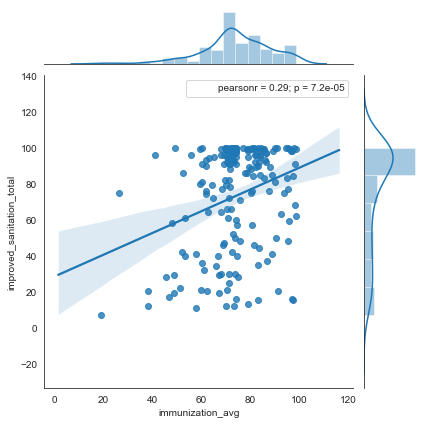

In [118]:
sns.jointplot(x='immunization_avg',y='improved_sanitation_total',data=data,kind='reg').annotate(stats.pearsonr)

In [126]:
mlr_model = ols(formula="Average_Primary_School_Completion~Average_Population+Average_Urban_Population+Agricultural_Land+adolescent_birth_rate+improved_sanitation_total+immunization_avg+relative_country_income", data=data).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.632
Model:                                           OLS   Adj. R-squared:                  0.616
Method:                                Least Squares   F-statistic:                     38.52
Date:                               Wed, 21 Aug 2019   Prob (F-statistic):           4.64e-31
Time:                                       17:55:26   Log-Likelihood:                -630.46
No. Observations:                                165   AIC:                             1277.
Df Residuals:                                    157   BIC:                             1302.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    66.0217      7.176      9.200      0.000      51.848      80.196
Average_Population         8.417e-05      0.002      0.054      0.957      -0.003       0.003
Average_Urban_Population     -0.0242      0.055     -0.440      0.661      -0.133       0.085
Agricultural_Land            -0.0284      0.043     -0.658      0.512      -0.114       0.057
adolescent_birth_rate        -0.1150      0.029     -3.910      0.000      -0.173      -0.057
improved_sanitation_total     0.2877      0.059      4.919      0.000       0.172       0.403
immunization_avg              0.0886      0.069      1.288      0.200      -0.047       0.225
relative_country_income       1.9356      1.621      1.194      0.234      -1.266       5.137
==============================================================================
Omnibus:                        9.866   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               20.311
Skew:                          -0.146   Prob(JB):                     3.89e-05
Kurtosis:                       4.694   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
mlr_model = ols(formula="Average_Primary_School_Completion~improved_sanitation_total+adolescent_birth_rate+Sub_Saharan_Africa*High_income+Sub_Saharan_Africa*Low_income", data=data2).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.703
Model:                                           OLS   Adj. R-squared:                  0.690
Method:                                Least Squares   F-statistic:                     53.36
Date:                               Wed, 21 Aug 2019   Prob (F-statistic):           1.76e-38
Time:                                       18:53:36   Log-Likelihood:                -621.67
No. Observations:                                166   AIC:                             1259.
Df Residuals:                                    158   BIC:                             1284.
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         82.0136      5.175     15.847      0.000      71.792      92.235
improved_sanitation_total          0.2091      0.055      3.785      0.000       0.100       0.318
adolescent_birth_rate             -0.0961      0.029     -3.324      0.001      -0.153      -0.039
Sub_Saharan_Africa                -7.3876      3.250     -2.273      0.024     -13.806      -0.969
High_income                       -2.5105      2.316     -1.084      0.280      -7.084       2.063
Sub_Saharan_Africa:High_income    24.9957     11.077      2.257      0.025       3.118      46.874
Low_income                         1.8188      5.385      0.338      0.736      -8.818      12.456
Sub_Saharan_Africa:Low_income    -15.5070      6.371     -2.434      0.016     -28.090      -2.924
==============================================================================
Omnibus:                       22.383   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.272
Skew:                          -0.486   Prob(JB):                     3.00e-14
Kurtosis:                       5.839   Cond. No.                     1.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
data2 = data.copy()
data2['ssaXrci']=data2.apply(lambda x: x['Sub_Saharan_Africa']*x['relative_country_income'], axis=1)
data2['upXabr']=data2['Average_Urban_Population']*data2['adolescent_birth_rate']

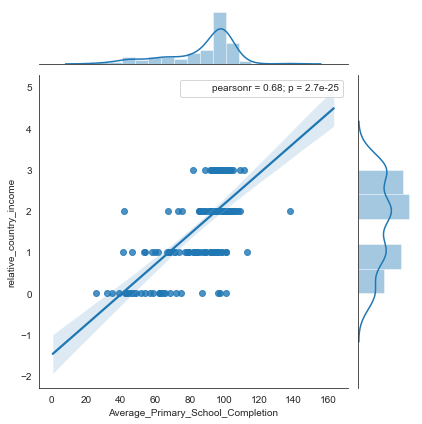

In [130]:
sns.jointplot(x='Average_Primary_School_Completion',y='relative_country_income',data=data,kind='reg').annotate(stats.pearsonr)

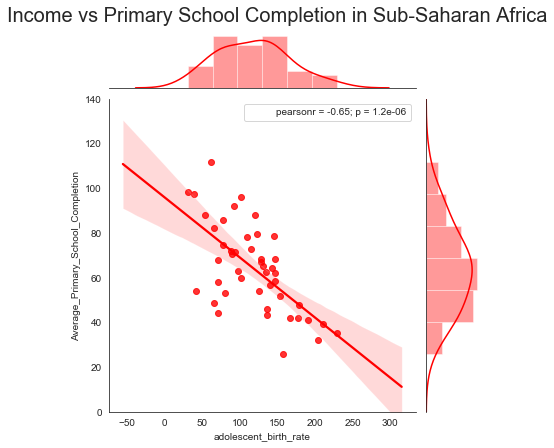

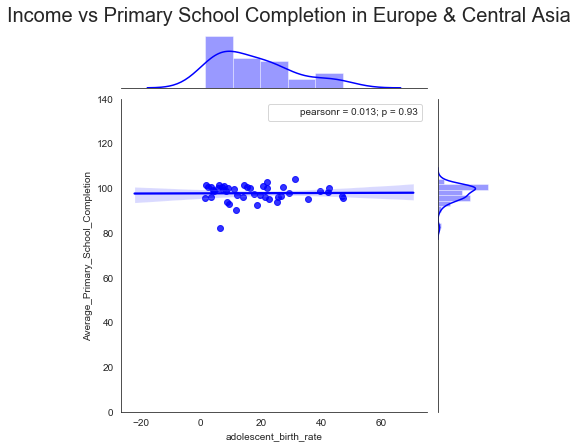

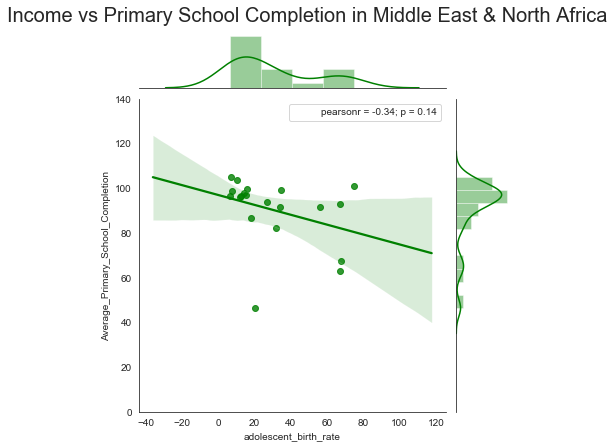

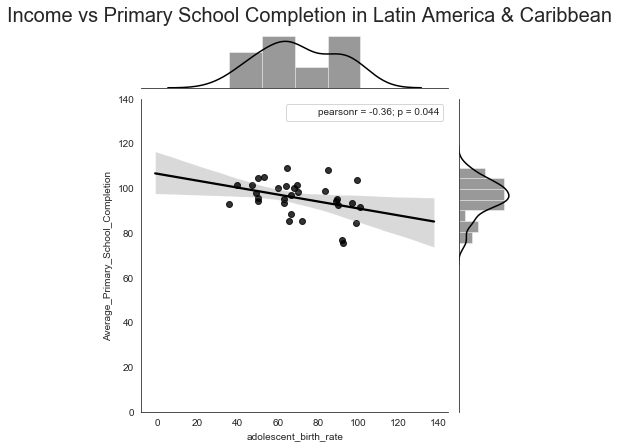

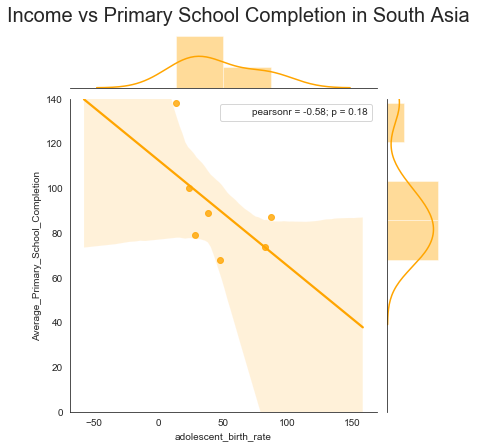

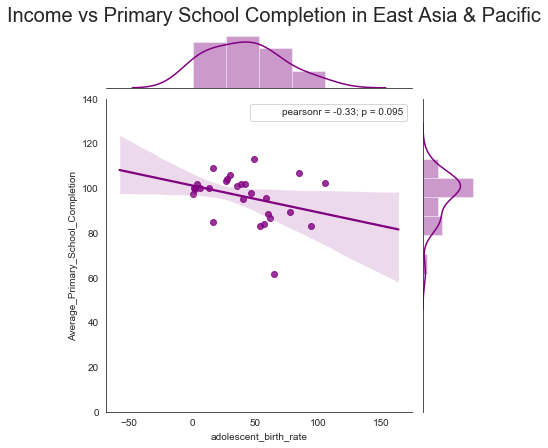

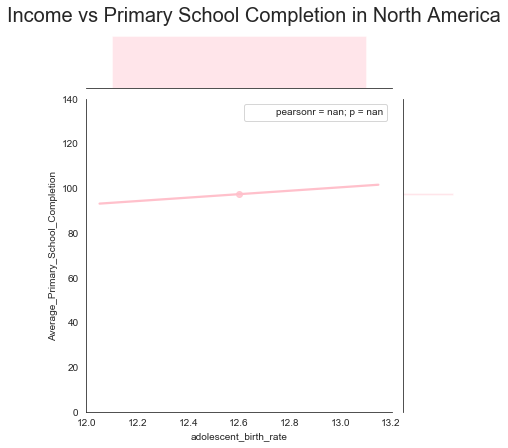

In [152]:
colors = ['red','blue','green','black','orange','purple','pink']
count=0
for region in list(zip(data['Region'].unique(),colors)):
    plots = sns.jointplot(x='adolescent_birth_rate',
                  y='Average_Primary_School_Completion',
                  data=data[data['Region']==region[0]],
                  color=region[1], label=region[0], kind='reg',
                  ylim=(0,140))
    plots.fig.suptitle('Income vs Primary School Completion in '+region[0],y=1.03,fontsize=20)
    plots.annotate(stats.pearsonr)
    count+=1

In [171]:
data.columns

Index(['Country_Name', 'Average_Primary_School_Completion',
       'Average_Female_Children_Employment',
       'Average_Male_Children_Employment', 'Average_GDP_Spent_on_Education',
       'Average_Population', 'Average_Urban_Population', 'Agricultural_Land',
       'GINI_Index', 'ed_to_military_ratio', 'adolescent_birth_rate',
       'improved_sanitation_total', 'immunization_avg', 'father_support',
       'Region', 'IncomeGroup', 'High_income', 'Low_income',
       'Lower_middle_income', 'Upper_middle_income', 'East_Asia_and_Pacific',
       'Europe_and_Central_Asia', 'Latin_America_and_Caribbean',
       'Middle_East_and_North_Africa', 'North_America', 'South_Asia',
       'Sub_Saharan_Africa', 'relative_country_income'],
      dtype='object')

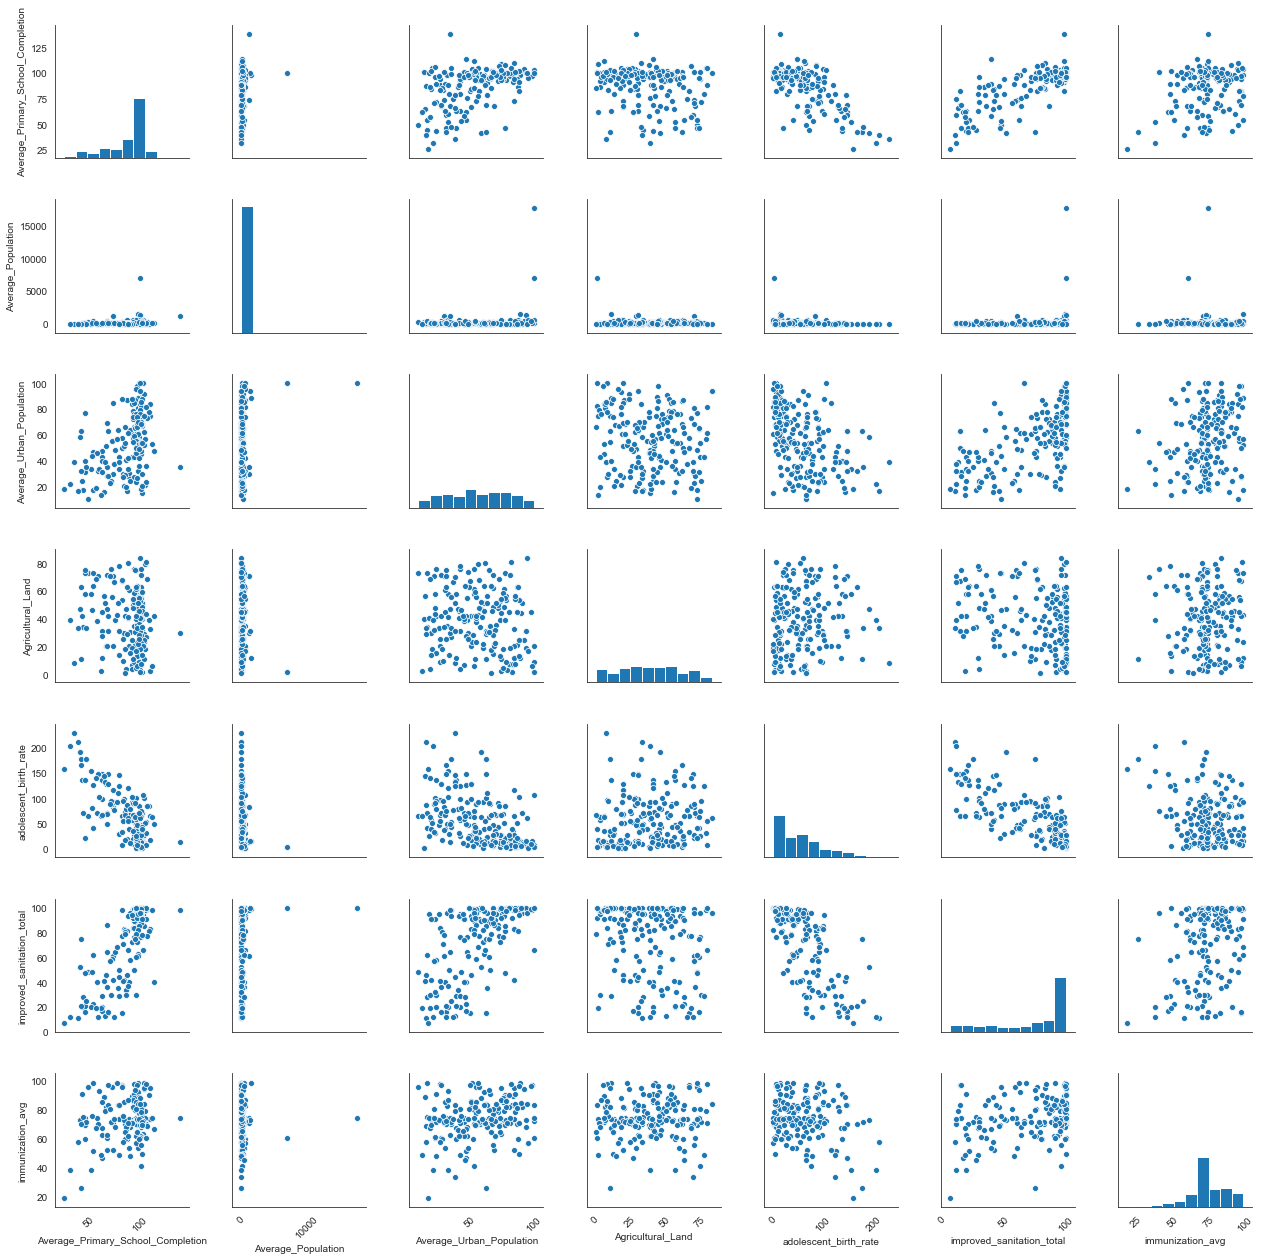

In [176]:
g = sns.pairplot(data[["Average_Primary_School_Completion",
                       "Average_Population", "Average_Urban_Population",
                       "Agricultural_Land", "adolescent_birth_rate",
                       "improved_sanitation_total","immunization_avg"]], diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [189]:
features = ['Average_Population','Average_Urban_Population','Agricultural_Land',
            'adolescent_birth_rate','improved_sanitation_total','immunization_avg']
data2 = data.copy()
scalar = StandardScaler()
scalar.fit(data2[features])
scaled_features=scalar.transform(data2[features])
scaled_data = pd.DataFrame(scaled_features,columns=features,index=data2.index)
scaled_data['Average_Primary_School_Completion'] = data2['Average_Primary_School_Completion']
scaled_data['Region'] = data2['Region'].str.slice(0,3)
scaled_data.head()


,Average_Population,Average_Urban_Population,Agricultural_Land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,Average_Primary_School_Completion,Region
1,-0.185898,0.119534,0.329126,2.772705,-0.730386,-0.068527,41.000475,Sub
2,-0.120297,-0.209186,0.124904,-0.814251,0.686609,0.864858,97.193730,Eur
3,-0.127853,1.197532,-1.521216,-0.470665,0.859413,1.098205,91.408940,Mid
4,-0.188510,1.500281,0.559098,0.262043,0.790291,0.577663,101.405976,Lat
5,-0.123362,0.334798,0.792649,-0.708692,0.548365,0.604587,95.185489,Eur


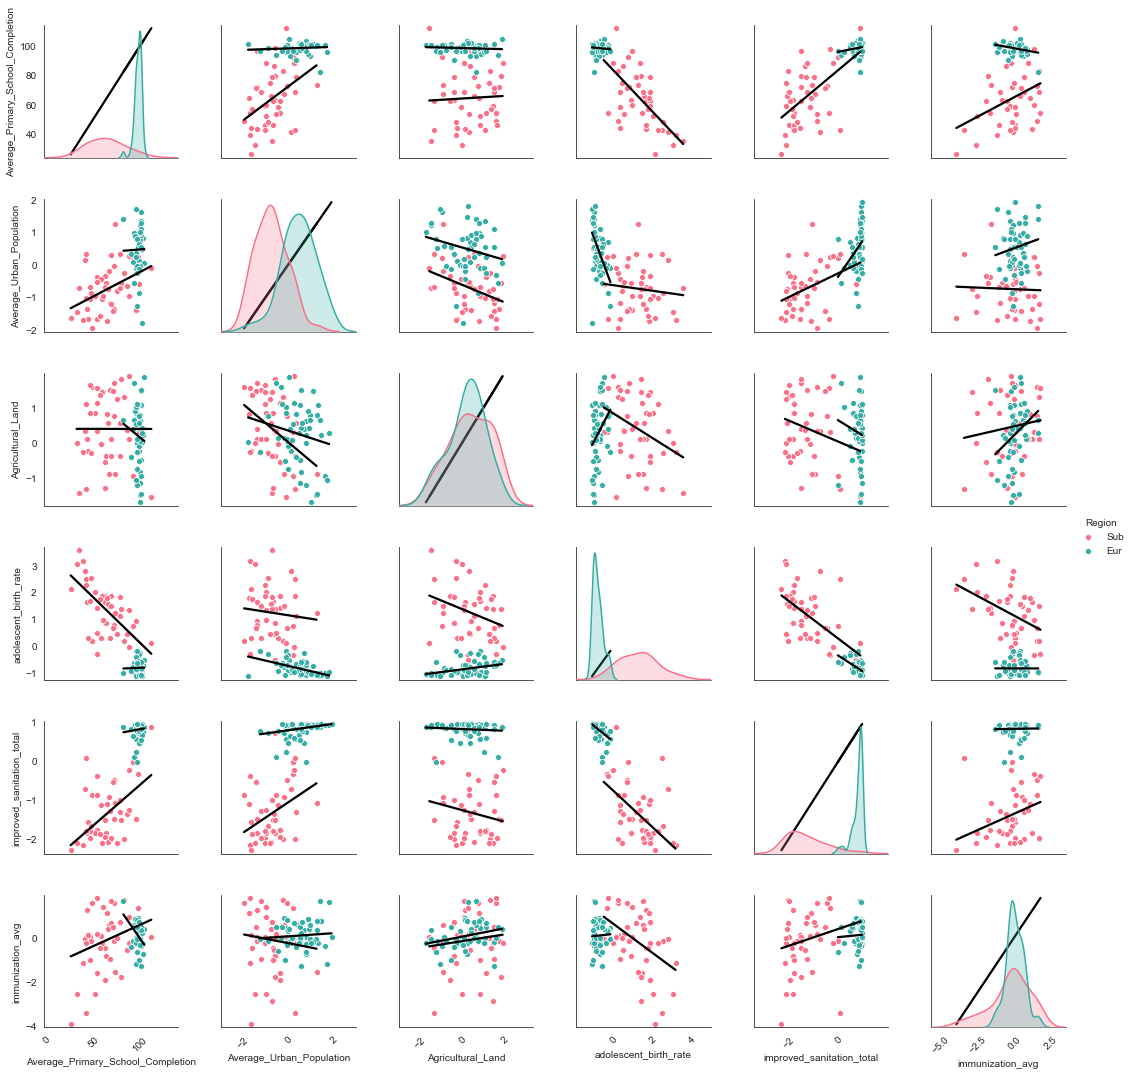

In [237]:
g = sns.pairplot(vars=["Average_Primary_School_Completion",
                       "Average_Urban_Population",
                       "Agricultural_Land", "adolescent_birth_rate",
                       "improved_sanitation_total","immunization_avg"],
                       hue='Region', palette='husl',
                       data=scaled_data[scaled_data['Region'].isin(['Sub','Eur'])])
g.map(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
# g.map_lower(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.autoscale(enable=True, tight=True)

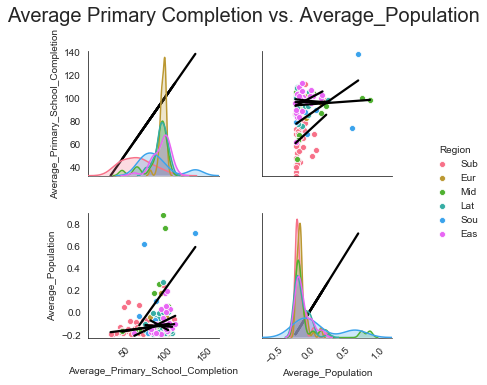

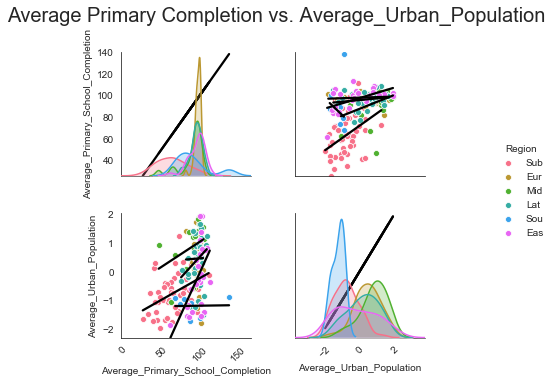

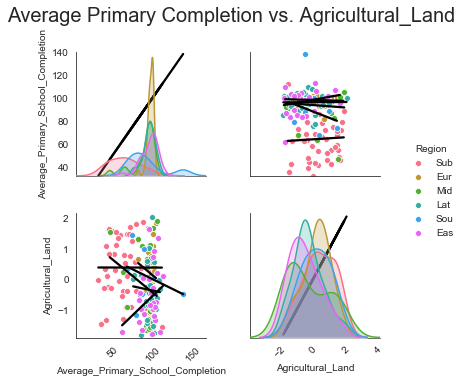

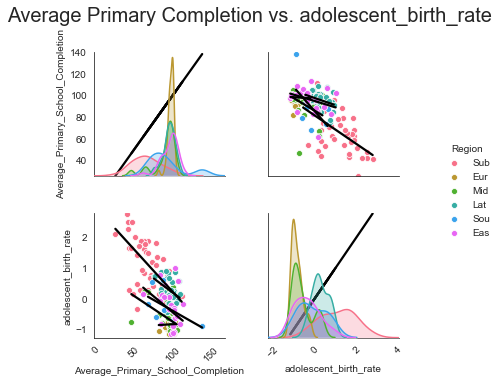

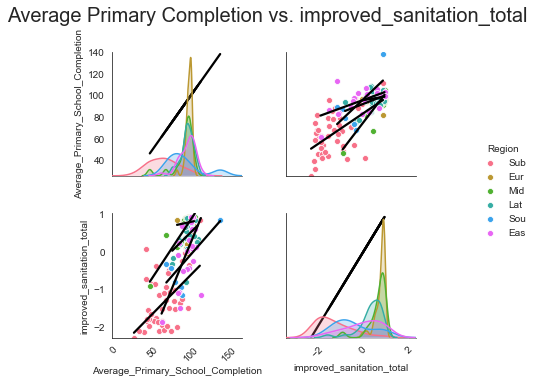

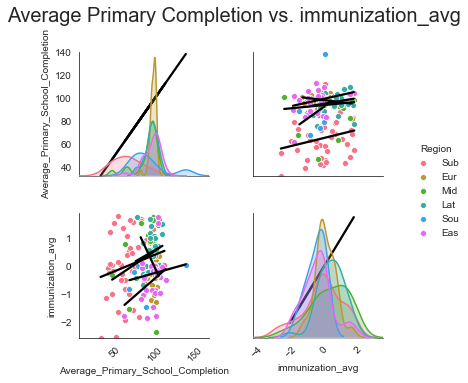

In [248]:
for feature in features:
    g = sns.pairplot(vars=["Average_Primary_School_Completion",feature],
                       hue='Region', palette='husl',
                       data=scaled_data[(~scaled_data['Region'].isin(['Nor']))&(scaled_data[feature]<3)&(scaled_data[feature]>-3)])
    g.map(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
    g.fig.suptitle(f'Average Primary Completion vs. {feature}',y=1.03,fontsize=20)
    # g.map_lower(sns.regplot,truncate=True,ci=None,color='black',scatter=False,robust=True)
    for ax in g.axes.flat: 
        plt.setp(ax.get_xticklabels(), rotation=45)
        ax.autoscale(enable=True, tight=True)

In [240]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(features), data=scaled_data[(~scaled_data['Region'].isin(['Nor']))&(scaled_data[feature]<3)&(scaled_data[feature]>-3)]).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.633
Model:                                           OLS   Adj. R-squared:                  0.619
Method:                                Least Squares   F-statistic:                     44.88
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.38e-31
Time:                                       11:52:39   Log-Likelihood:                -620.24
No. Observations:                                163   AIC:                             1254.
Df Residuals:                                    156   BIC:                             1276.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    88.1403      0.880    100.154      0.000      86.402      89.879
Average_Population           -0.2007      2.106     -0.095      0.924      -4.361       3.960
Average_Urban_Population      0.3436      1.115      0.308      0.758      -1.859       2.546
Agricultural_Land            -1.0767      0.894     -1.205      0.230      -2.842       0.689
adolescent_birth_rate        -4.7621      1.425     -3.342      0.001      -7.576      -1.948
improved_sanitation_total    10.0923      1.560      6.468      0.000       7.010      13.174
immunization_avg              0.4493      0.982      0.457      0.648      -1.491       2.390
==============================================================================
Omnibus:                        9.715   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               21.528
Skew:                          -0.036   Prob(JB):                     2.11e-05
Kurtosis:                       4.779   Cond. No.                         3.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
scaled_data['IncomeGroup']=data2['IncomeGroup']
scaled_data = pd.concat([scaled_data,pd.get_dummies(scaled_data['IncomeGroup']),
                         pd.get_dummies(scaled_data['Region'])],1)
scaled_data.head()

,Average_Population,Average_Urban_Population,Agricultural_Land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,Average_Primary_School_Completion,Region,IncomeGroup,High income,Low income,Lower middle income,Upper middle income,Eas,Eur,Lat,Mid,Nor,Sou,Sub,High income,Low income,Lower middle income,Upper middle income,Eas,Eur,Lat,Mid,Nor,Sou,Sub
1,-0.185898,0.119534,0.329126,2.772705,-0.730386,-0.068527,41.000475,Sub,Lower middle income,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,-0.120297,-0.209186,0.124904,-0.814251,0.686609,0.864858,97.193730,Eur,Upper middle income,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,-0.127853,1.197532,-1.521216,-0.470665,0.859413,1.098205,91.408940,Mid,High income,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.188510,1.500281,0.559098,0.262043,0.790291,0.577663,101.405976,Lat,Upper middle income,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,-0.123362,0.334798,0.792649,-0.708692,0.548365,0.604587,95.185489,Eur,Upper middle income,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.629
Model:                                           OLS   Adj. R-squared:                  0.615
Method:                                Least Squares   F-statistic:                     44.58
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.33e-31
Time:                                       11:46:28   Log-Likelihood:                -631.21
No. Observations:                                165   AIC:                             1276.
Df Residuals:                                    158   BIC:                             1298.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.9214      0.893     98.414      0.000      86.157      89.686
Average_Population            0.0483      2.145      0.023      0.982      -4.189       4.285
Average_Urban_Population      0.1367      1.135      0.121      0.904      -2.104       2.377
Agricultural_Land            -0.8814      0.905     -0.974      0.332      -2.669       0.906
adolescent_birth_rate        -5.9352      1.386     -4.281      0.000      -8.674      -3.197
improved_sanitation_total     9.1362      1.553      5.884      0.000       6.069      12.203
immunization_avg              1.2356      0.960      1.288      0.200      -0.660       3.131
==============================================================================
Omnibus:                       10.982   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               23.775
Skew:                          -0.179   Prob(JB):                     6.88e-06
Kurtosis:                       4.825   Cond. No.                         3.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

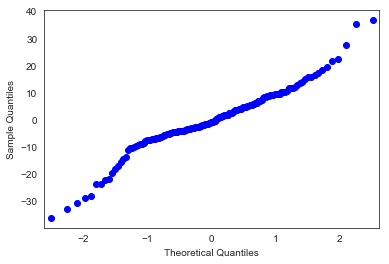

In [238]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(features), data=scaled_data).fit()
sm.qqplot(mlr_model.resid)
mlr_model.summary()

In [247]:
data2[features+['Average_Primary_School_Completion']].sort_values('Average_Primary_School_Completion')

,Average_Population,Average_Urban_Population,Agricultural_Land,adolescent_birth_rate,improved_sanitation_total,immunization_avg,Average_Primary_School_Completion
151,NaN,17.841211,NaN,158.00,7.0,19.250,25.733910
160,9.296887,22.092632,39.245366,203.40,12.0,38.250,31.961525
25,6.794024,39.005263,8.261242,229.00,NaN,NaN,35.062418
119,12.820258,16.250263,33.582305,210.00,11.0,58.000,39.204390
1,18.382628,58.639895,46.671448,190.90,52.0,73.000,41.000475
64,32.898199,62.937316,10.890217,177.00,75.0,26.375,42.075974
113,29.435601,31.842684,62.806037,166.00,21.0,70.375,42.158185
11,56.071821,23.869526,41.724716,136.00,20.0,91.125,43.312480
53,86.244572,17.257263,34.258271,71.20,28.0,75.125,44.042136
63,53.526101,39.748316,57.599782,136.70,21.0,59.875,45.846244


In [396]:
scaled_data2=scaled_data.copy()
for feature in features:
    scaled_data2[scaled_data2[feature].abs()>2] = np.nan

In [397]:
scaled_data2.dropna(inplace=True)

In [393]:
scaled_data2.shape

(150, 31)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Average_Primary_School_Completion   R-squared:                       0.604
Model:                                           OLS   Adj. R-squared:                  0.588
Method:                                Least Squares   F-statistic:                     39.09
Date:                               Thu, 22 Aug 2019   Prob (F-statistic):           1.28e-28
Time:                                       14:31:02   Log-Likelihood:                -610.71
No. Observations:                                161   AIC:                             1235.
Df Residuals:                                    154   BIC:                             1257.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    88.8545      1.002     88.653      0.000      86.874      90.834
Average_Population            5.1372      5.405      0.950      0.343      -5.541      15.816
Average_Urban_Population      0.3899      1.110      0.351      0.726      -1.803       2.583
Agricultural_Land            -1.1936      0.885     -1.348      0.180      -2.942       0.555
adolescent_birth_rate        -3.7462      1.471     -2.547      0.012      -6.652      -0.840
improved_sanitation_total    10.2577      1.557      6.589      0.000       7.182      13.333
immunization_avg             -0.1041      0.996     -0.105      0.917      -2.072       1.864
==============================================================================
Omnibus:                        9.483   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               19.055
Skew:                          -0.145   Prob(JB):                     7.28e-05
Kurtosis:                       4.660   Cond. No.                         8.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

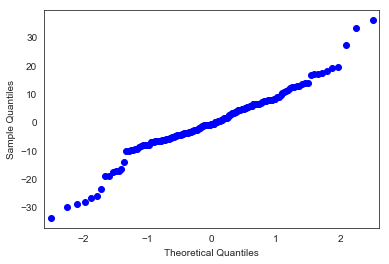

In [268]:
mlr_model = ols(formula="Average_Primary_School_Completion~"+"+".join(features), data=scaled_data2).fit()
sm.qqplot(mlr_model.resid)
mlr_model.summary()

In [413]:
scaled_data2['pop_dense_transformed']=(scaled_data2['Average_Population']+2*(scaled_data2['Average_Population'].std()))**0.3
# scaled_data2['avg_prim']=np.log(scaled_data2['Average_Primary_School_Completion'])/np.log(2)
scaled_data2['avg_prim']=(scaled_data2['Average_Primary_School_Completion'])**2
scaled_data2['adol_transform'] = (scaled_data2['adolescent_birth_rate']+3)**0.5
scaled_data2['san_transforme'] = 4.5**scaled_data2['improved_sanitation_total']

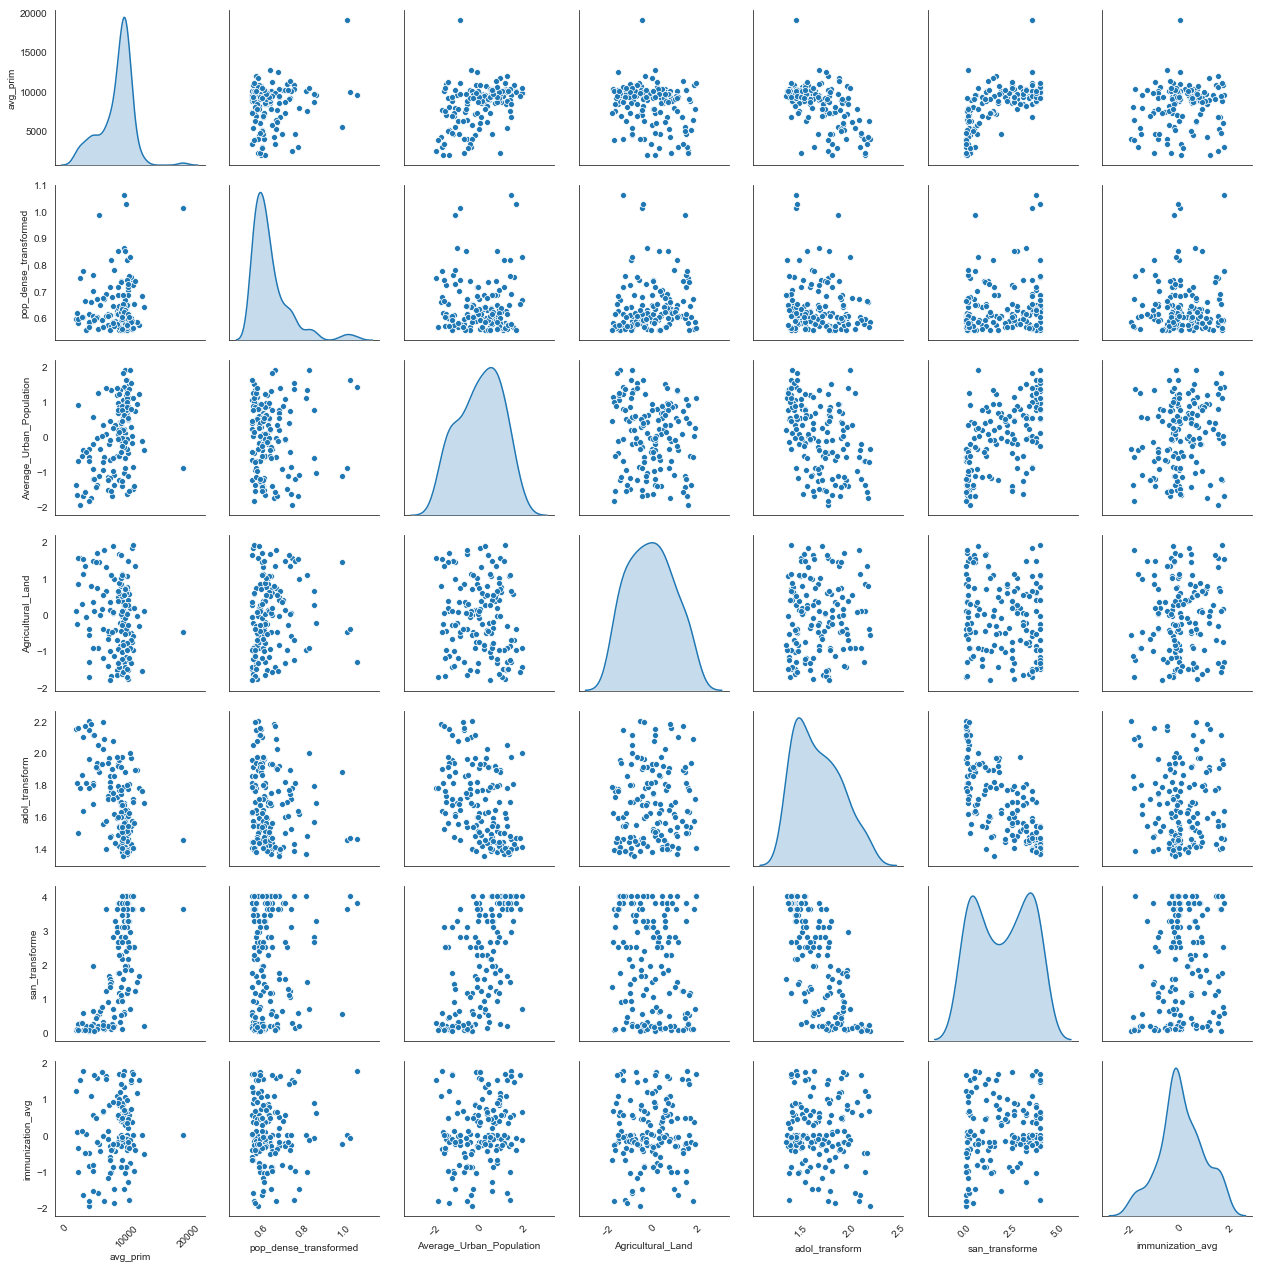

In [414]:
g = sns.pairplot(scaled_data2[["avg_prim",
                       "pop_dense_transformed", "Average_Urban_Population",
                       "Agricultural_Land", "adol_transform",
                       "san_transforme","immunization_avg"]], diag_kind="kde")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [418]:
transformed=["Average_Urban_Population",
                       "Agricultural_Land", "adol_transform",
                       "san_transforme","immunization_avg"]
modells = ols(formula='avg_prim~'+"+".join(transformed),data=scaled_data2).fit()
modells.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avg_prim   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     22.69
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           9.65e-17
Time:                        15:52:11   Log-Likelihood:                -1347.2
No. Observations:                 150   AIC:                             2706.
Df Residuals:                     144   BIC:                             2724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.013e+04   2041.889      4.960      0.000    6092.245    1.42e+04
Average_Urban_Population   157.1753    203.276      0.773      0.441    -244.616     558.966
Agricultural_Land         -211.8701    166.678     -1.271      0.206    -541.322     117.582
adol_transform           -2044.2936   1049.861     -1.947      0.053   -4119.424      30.836
san_transforme             815.0194    185.977      4.382      0.000     447.422    1182.617
immunization_avg            55.0913    192.000      0.287      0.775    -324.411     434.594
==============================================================================
Omnibus:                       25.634   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.586
Skew:                           0.674   Prob(JB):                     1.56e-14
Kurtosis:                       5.891   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [419]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

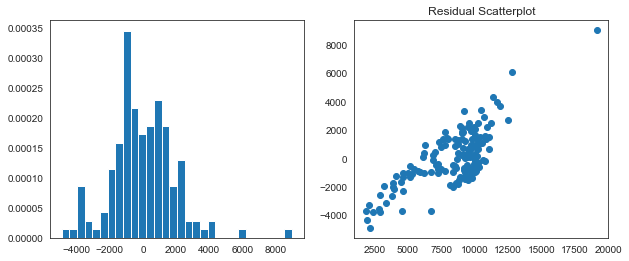

In [420]:
checkresiduals(scaled_data2,'avg_prim',modells)